What factors might influence the biological diversity of a New York county?   The number of people who live there?  The wealth of its citizens?

This data set is from Data.gov, is from New York State, and is entitled "Biodiversity by County".  I will be comparing this information with another data set, entitled Annual Average Daily Traffic, published by Data.NY.Gov, and one also by Data.gov, entitled "Total Income And Tax Liability."  

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import json

csv_file_path = "/Users/Micah.Isser/downloads/Biodiversity_by_County.csv"

df = pd.read_csv(csv_file_path)

print(df.head())

   County Category Taxonomic Group Taxonomic Subgroup  \
0  Albany   Animal      Amphibians    Frogs and Toads   
1  Albany   Animal      Amphibians    Frogs and Toads   
2  Albany   Animal      Amphibians    Frogs and Toads   
3  Albany   Animal      Amphibians    Frogs and Toads   
4  Albany   Animal      Amphibians    Frogs and Toads   

           Scientific Name    Common Name Year Last Documented  \
0      Anaxyrus americanus  American Toad            1990-1999   
1         Anaxyrus fowleri  Fowler's Toad            1990-1999   
2          Hyla versicolor  Gray Treefrog            1990-1999   
3  Lithobates catesbeianus       Bullfrog            1990-1999   
4     Lithobates clamitans     Green Frog            1990-1999   

       NY Listing Status Federal Listing Status State Conservation Rank  \
0  Game with open season             not listed                      S5   
1  Game with open season             not listed                      S4   
2  Game with open season           

The two columns that I am most inteterested in are "County" and "Scientific Name" - because these two columns will help shed light on the biodiversity by county.  Let's look at how many distinct entries are in each of these columns.

In [4]:
distinct_counties = df['County'].nunique()

print("Number of distinct entries under the column 'County':", distinct_counties)

distinct_counties = df['Scientific Name'].nunique()

print("Number of distinct entries under the column 'Scientific Name':", distinct_counties)

Number of distinct entries under the column 'County': 66
Number of distinct entries under the column 'Scientific Name': 1582


Before analyzing the number of species per county, first let's look at how many species are of each type.  

In [5]:
unique_taxonomic_subgroups = df['Taxonomic Group'].unique()

print("Unique entries within the column 'Taxonomic Group':")
for subgroup in unique_taxonomic_subgroups:
    print(subgroup)

Unique entries within the column 'Taxonomic Group':
Amphibians
Birds
Animal Assemblages
Bees, Wasps and Ants
Butterflies and Moths
Dragonflies and Damselflies
Fish
Mammals
Mussels and Clams
Other Animals
Reptiles
Freshwater Nontidal Wetlands
Tidal Wetlands
Uplands
Conifers
Ferns and Fern Allies
Flowering Plants
Mosses
Marine
Beetles
Rivers and Streams
Lakes and Ponds
Flies
Snails
Stoneflies
Subterranean
Mayflies


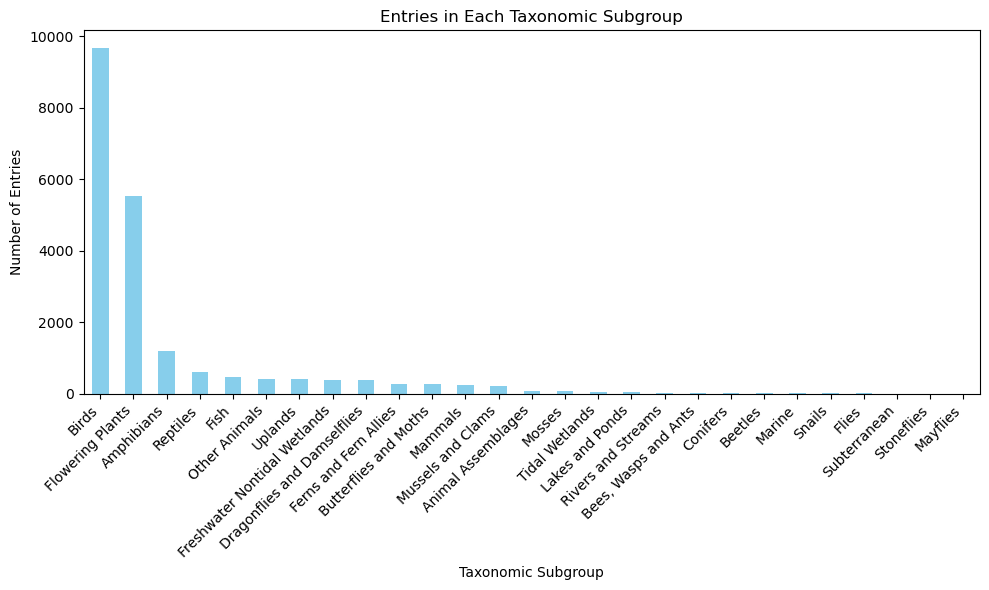

In [18]:
subgroup_counts = df['Taxonomic Group'].value_counts()

plt.figure(figsize=(10, 6))
subgroup_counts.plot(kind='bar', color='skyblue')
plt.title('Entries in Each Taxonomic Subgroup')
plt.xlabel('Taxonomic Subgroup')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

So there seem to be many more birds recorded than any other species of animal.  I'm a bit skeptical about this result, since I would have thought that there are far more insects than birds in most areas; however there are probably a lot more bird watchers than amateur entomologists.  Now let's look at the biodiversity by county.  

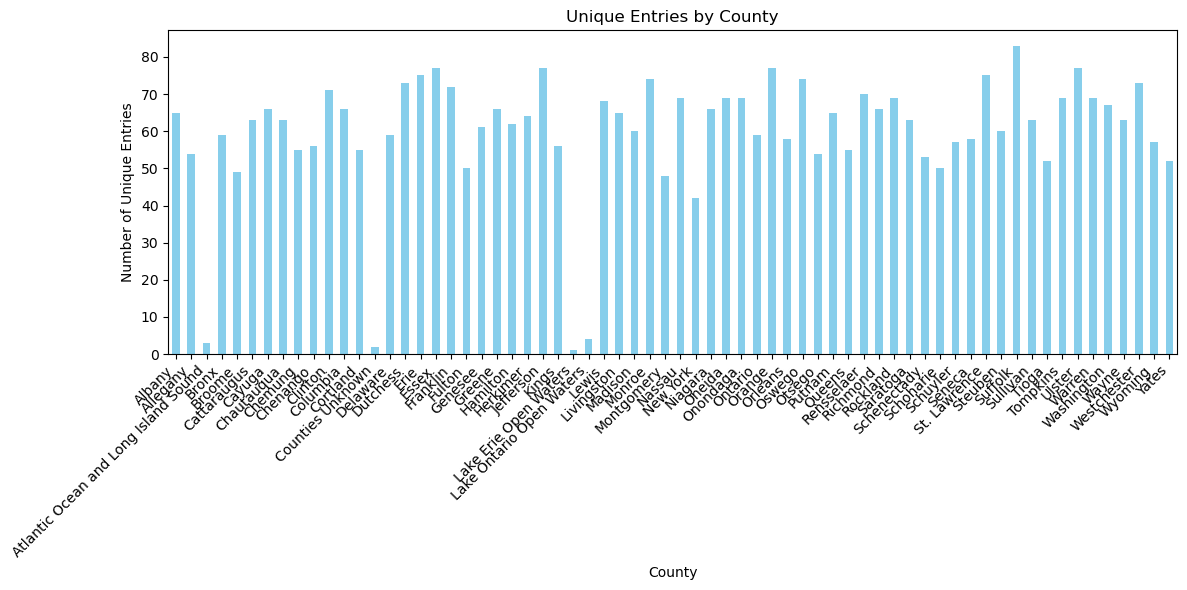

In [6]:
county_counts = df.groupby('County')['Taxonomic Subgroup'].nunique()

plt.figure(figsize=(12, 6))
county_counts.plot(kind='bar', color='skyblue')
plt.title('Unique Entries by County')
plt.xlabel('County')
plt.ylabel('Number of Unique Entries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This graph is very busy, and does not tell me much about whether these counties are closer to NYC, upstate, or in between.  So I am going to try to layer it onto a geographical map of New York Counties.  First I want to verify that the county names in the geojson file and the biodiversity data match up.

In [9]:
biodiversity_data = pd.read_csv("/Users/Micah.Isser/downloads/Biodiversity_by_County.csv")

with open("/Users/Micah.Isser/downloads/nys-county-boundaries.geojson") as f:
    nys_counties_geojson = json.load(f)

biodiversity_county_names = set(biodiversity_data['County'])

geojson_county_names = set(feature['properties']['name'] for feature in nys_counties_geojson['features'])

common_county_names = biodiversity_county_names.intersection(geojson_county_names)

print("Common County Names:")
for county_name in common_county_names:
    print(county_name)

Common County Names:
Monroe
Bronx
Wyoming
Orleans
Clinton
St. Lawrence
Rockland
New York
Tioga
Chenango
Onondaga
Seneca
Greene
Franklin
Otsego
Sullivan
Tompkins
Columbia
Lewis
Albany
Cattaraugus
Dutchess
Orange
Putnam
Erie
Cayuga
Rensselaer
Kings
Ontario
Chemung
Cortland
Essex
Allegany
Livingston
Montgomery
Hamilton
Washington
Herkimer
Schenectady
Fulton
Westchester
Ulster
Oswego
Schuyler
Steuben
Chautauqua
Wayne
Oneida
Jefferson
Delaware
Genesee
Schoharie
Madison
Queens
Suffolk
Nassau
Warren
Richmond
Saratoga
Yates
Niagara
Broome


Now I want to see the data that will be expressed in the graph: the levels of biodiversity by county

In [10]:
biodiversity_data = pd.read_csv("/Users/Micah.Isser/downloads/Biodiversity_by_County.csv")

species_count_by_county = biodiversity_data.groupby('County')['Scientific Name'].nunique().reset_index()

print(species_count_by_county)

                                  County  Scientific Name
0                                 Albany              403
1                               Allegany              241
2   Atlantic Ocean and Long Island Sound               14
3                                  Bronx              289
4                                 Broome              245
..                                   ...              ...
61                            Washington              351
62                                 Wayne              302
63                           Westchester              448
64                               Wyoming              263
65                                 Yates              242

[66 rows x 2 columns]


Now I'm going to use Geopandas to graph the amount of biological diversity over the map of New York State.

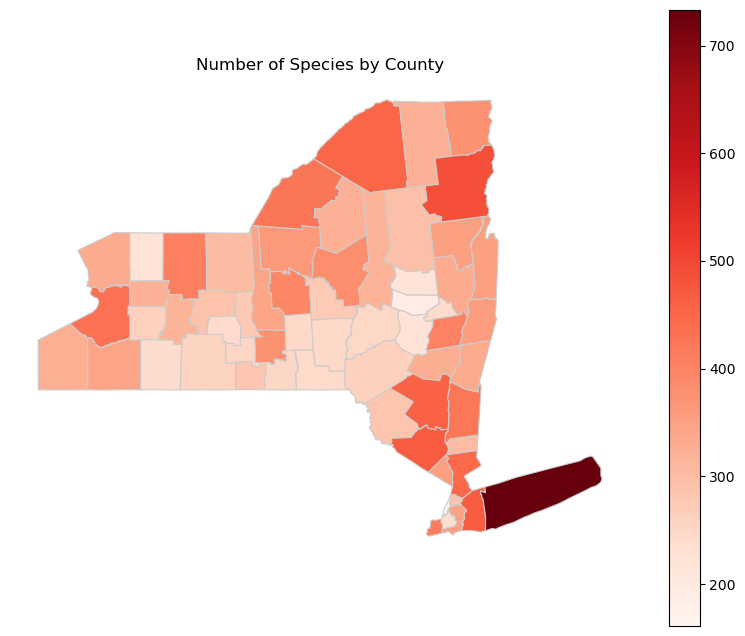

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

biodiversity_data = pd.read_csv("/Users/Micah.Isser/downloads/Biodiversity_by_County.csv")
species_count_by_county = biodiversity_data.groupby('County')['Scientific Name'].nunique().reset_index()

nys_counties_geojson = gpd.read_file("/Users/Micah.Isser/downloads/nys-county-boundaries.geojson")

merged_data = pd.merge(nys_counties_geojson, species_count_by_county, 
                       left_on='name', right_on='County', how='left')

merged_data['text'] = merged_data['name']

fig, ax = plt.subplots(figsize=(10, 8))
merged_data.plot(column='Scientific Name', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Number of Species by County')
ax.axis('off')
plt.show()

This produces some surprising results.  For one, there is an enormous amount of diversity on Long Island.  And while there may be a loose correlation between higher latitudes and more diversity, this pattern does not consistantly hold.  Indeed Ulster, Orange, and Westchester have very high biodiversity, dispite being so far south, have a large number of distinct species.  

I have two suspicions about what might be accounting for biodiversity (assuming that this data is not being skewed by a disporportunate number of Long Island birdwatchers).  Higher human population density may make enough pollution, traffic, and noise to scare away animals.  Alternatively, the affluence of the county may correlate biodiversity, either lowering it because of expensive landscaping or raising it because of conservation efforts. 

In [12]:

population_data = pd.read_csv("/Users/Micah.isser/downloads/NYS_Population.csv")

print(population_data.head())

   FIPS Code        Geography  Year                    Program Type  \
0      36000   New York State  2022  Postcensal Population Estimate   
1      36001    Albany County  2022  Postcensal Population Estimate   
2      36003  Allegany County  2022  Postcensal Population Estimate   
3      36005     Bronx County  2022  Postcensal Population Estimate   
4      36007    Broome County  2022  Postcensal Population Estimate   

   Population  
0    19677151  
1      315811  
2       46694  
3     1379946  
4      197117  


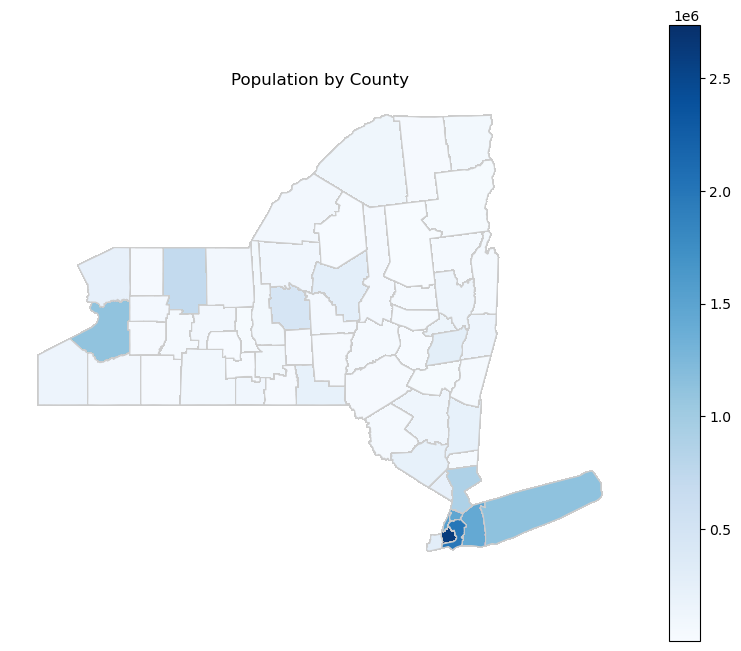

In [16]:
population_data = pd.read_csv("/Users/Micah.isser/downloads/NYS_Population.csv")
nys_counties_geojson = gpd.read_file("/Users/Micah.Isser/downloads/nys-county-boundaries.geojson")

population_data['Geography'] = population_data['Geography'].str.replace(' County', '')

merged_data = pd.merge(nys_counties_geojson, population_data, left_on='name', right_on='Geography', how='left')

fig, ax = plt.subplots(figsize=(10, 8))
merged_data.plot(column='Population', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Population by County')
ax.axis('off')
plt.show()

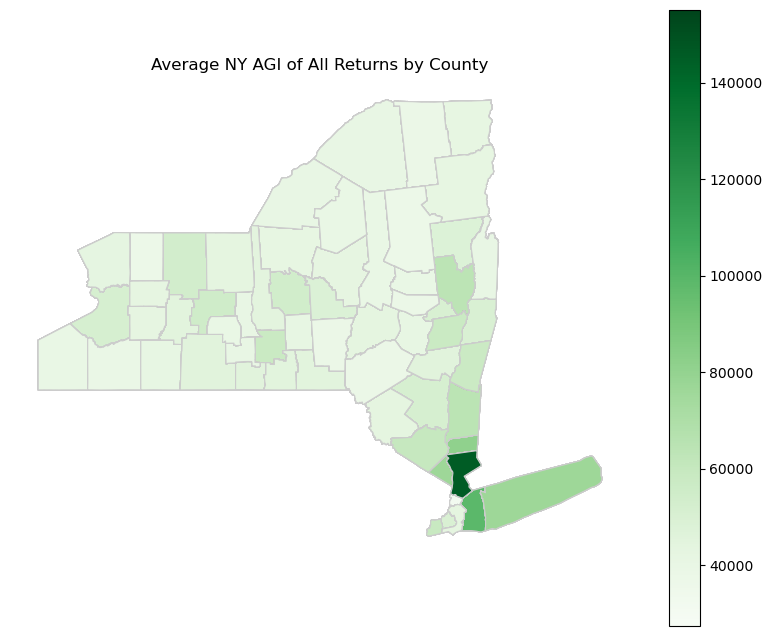

In [14]:
import pandas as pd
import geopandas as gpd
import plotly.express as px

tax_data = pd.read_csv("/Users/Micah.isser/downloads/NYS_Taxes.csv")
nys_county_boundaries = gpd.read_file("/Users/Micah.Isser/downloads/nys-county-boundaries.geojson")

tax_data_filtered = tax_data[['County', 'Average NY AGI of All Returns']]
tax_data_filtered = tax_data_filtered.dropna(subset=['County', 'Average NY AGI of All Returns'])

merged_data = pd.merge(nys_county_boundaries, tax_data_filtered, left_on='name', right_on='County', how='left')


fig, ax = plt.subplots(figsize=(10, 8))
merged_data.plot(column='Average NY AGI of All Returns', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Average NY AGI of All Returns by County')
plt.axis('off')
plt.show()

So these maps have been fairly inconclusive - it does not seem that population density or average wealth have a significant correlation with biodiversity.  As a last experiment, let's look at the conservation status of organisms in the original data set, then overlay that onto a map to determine where there are the most endangered species.  In the following pie chart, the order of endangered animals from most to least endagered, goes SH, S1, S2, S3 etc.

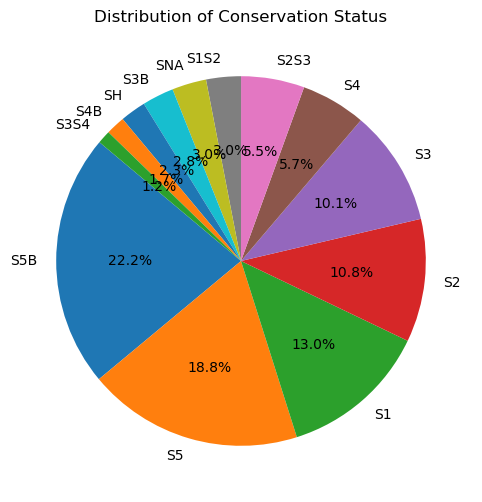

In [99]:
biodiversity_data = pd.read_csv("/Users/Micah.Isser/downloads/Biodiversity_by_County.csv")

conservation_rank_percentage = biodiversity_data['State Conservation Rank'].value_counts(normalize=True) * 100
conservation_rank_percentage = conservation_rank_percentage[conservation_rank_percentage >= 1]


plt.figure(figsize=(8, 6))
conservation_rank_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Conservation Status')
plt.ylabel('')
plt.show()

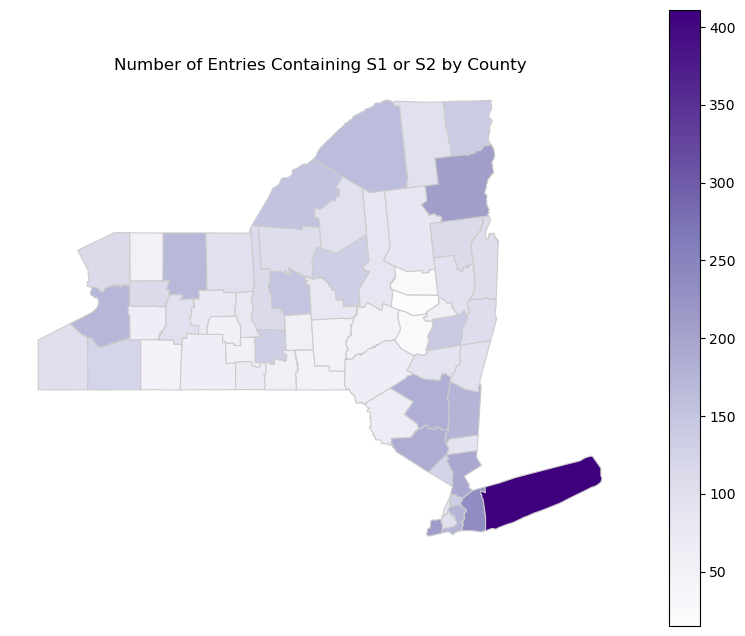

In [103]:
filtered_data = biodiversity_data[biodiversity_data['State Conservation Rank'].str.contains('S1|S2')]

county_counts = filtered_data.groupby('County').size().reset_index(name='Count')

nys_county_boundaries = gpd.read_file("/Users/Micah.Isser/downloads/nys-county-boundaries.geojson")

merged_data = pd.merge(nys_county_boundaries, county_counts, left_on='name', right_on='County', how='left')

fig, ax = plt.subplots(figsize=(10, 8))
merged_data.plot(column='Count', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Entries Containing S1 or S2 by County')
plt.axis('off')
plt.show()

The density of endangered animals matches that of NYS biodiversity as a whole: with Long Island leading the pack.  The best explanation might be one I found on iNaturalist.org - that Long Island's divergent biomes allow for more types of species to flourish there: "Long Island hosts a large chunk of New York's biodiversity, mixing the nutrient poor southeastern pine barrens with the cool northeastern deciduous woodlands and the desert-like coastal dune scrub."  In the end, the data did a good job of showing that biological diversity is less impaced by human actions in New York than I might have initially thought.